# Exploratory Data Analysis 
## Belltown North Parking Data | March 2019 

In [103]:
import pandas as pd
import numpy as np
import pandas.io.sql as pdsql
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install psycopg2
import json
import psycopg2

In [74]:
# Set display options 
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#connect to the server
conn = psycopg2.connect(host="rds-trafficjam.cpze98eqmmci.us-east-2.rds.amazonaws.com",
	                    database="dbtrafficjam", user="trafficjam", password="anss!!596")

cur = conn.cursor()

## Read in table/view

In [4]:
### Read in Table
df_2017 = pd.read_sql("SELECT * FROM vw_2017_join", conn)

In [6]:
df_2018 = pd.read_sql("SELECT * FROM vw_2018_join", conn)

## Exploratory Data Analysis | 03/26/2019

### Define the variables

I will begin EDA by describing each variable in the dataframes for 2017 and 2018 (which have identical column names). However, I noticed that the variable `empty_slots` in 2017 should be renamed to match `empty_spots` variable in 2018. 

In [24]:
# Rename column
df_2017.rename(columns={'empty_slots': 'empty_spots'}, inplace=True)

I will provide a brief description of each variable: 
- `source_element_key`: unique identifier for pay station identifying each blockface
- `main_lane`: main road along which the blockface runs 
- `between_one`: the road that intersects `main_lane` on one end
- `between_second`: the road that intersects `main_lane` on the other end
- `sideofstreet`: cardinal direction idicating which side of the street (possible values: SW, NW, NE, SE, W, and E) 
- `date_of_transaction`: date in format YYYY/MM/DD for automatic transaction data
- `mm_transaction`: month of transaction data
- `yyyy_transaction`: year of transaction data
- `dd_transaction`: day of transaction data
- `dow_transaction`: day of week (values 1-6, Mon-Sat) 
- `doy_transaction`: day of year
- `week_transaction`: week of year 
- `time_of_transaction`: time of day for the transaction (in format HH:MM:SS) 
- `hour_transaction`: hour of the transaction 
- `min_transaction`: minute of transaction (this data is in 30 min intervals so the values are 0 or 30)
- `occupied_spots`: number of spots that are occupied on that blockface, according to automatic transaction data 
- `empty_spots`: number empty spots on that blockface, according to automatic transaction data
- `total_spots`: total number of spots at that blockface 
- `paidparkingarea`: this data concerns Belltown neighborhood, which is the only possible value for this field 
- `paidparkingsubarea`: the subarea is Belltown North, so `North` is the only possible value for this field 
- `parkingcategory`: possible values include `Paid Parking` or `Carpool Parking`
- `parkingtimelimitcategory`: possible vlaues include 240 or 30 (in minutes) 
- `latitude`: latitude coordinates
- `longitude`: longitude coordinates
- `geog`: pgAdmin GIS generated value based on lat and long
- `segkey`: 
- `total_spots_survey`: total parking spots according to manual survey 
- `occupied_spots_survey`: occupied parking spots according to manual survey 
- `time_of_survey`: time of survey (in format HH:MM:SS)
- `weather_at_hour`: weather data was available on the hour
- `average_temp`: temperature (in F) averaged over that hourly segment of weather data
- `rain_inches`: rainfall in inches 
- `humidity`: humidity as percent of air saturated with water vapor 
- `event`: name of event 
- `employment`: employment count in Seattle region for each month in the year 
- `avg_traffic_density`: average traffic density 
- `main_city_street`: 0 or 1 for whether the street is a main route (1=yes)
- `business_license_count`: count of businesses licensed within 200 meters (all subsequent variables concern specific types of businesses within 200m)
- `parking_lots_garages_count`: count of parking garages and lots 
- `banks_count`: count of banks
- `bars_restaurants_count`: count of bars and restaurants
- `event_venues_count`: count of event venues
- `grocery_market_count`: count of grocery markets
- `gyms_count`: count of gyms
- `hotels_count`: count of hotels
- `medical_offices_count`: count of medical offices
- `museums_count`: count of museums
- `salons_count`: count of salons
- `shopping_count`: count of shops 

### Basic summary statistics

Combine 2017 and 2018 data into a single df for EDA. 

In [85]:
all_df = pd.concat([df_2017, df_2018])

In [86]:
all_df.shape

(2242564, 49)

In [87]:
df_2017.shape

(1083460, 49)

In [88]:
df_2018.shape

(1159104, 49)

Calculate some basic summary statistics for pertinent variables across each year. In particular, compare mean values for data on parking spots in the automatic vs. manual survey. 

In [96]:
summ_all = all_df[['occupied_spots', 'empty_spots', 'total_spots',
         'total_spots_survey', 'occupied_spots_survey']].describe()

In [97]:
summ_2017 = df_2017[['occupied_spots', 'empty_spots', 'total_spots',
         'total_spots_survey', 'occupied_spots_survey']].describe()

In [98]:
summ_2018 = df_2018[['occupied_spots', 'empty_spots', 'total_spots',
         'total_spots_survey', 'occupied_spots_survey']].describe()

In [119]:
# Take each of the three series created above, 
# get the mean for each variable and combine into one df
summ_df = pd.concat([summ_2017.loc['mean',:].rename('2017'),
                     summ_2018.loc['mean',:].rename('2018'),
                     summ_all.loc['mean',:].rename('both_years')], 
                    axis=1)
print('Mean values for each variable:')
summ_df

Mean values for each variable:


,2017,2018,both_years
occupied_spots,4.200,4.275,4.239
empty_spots,3.186,3.071,3.127
total_spots,7.387,7.347,7.366
total_spots_survey,7.037,7.243,7.143
occupied_spots_survey,5.563,5.888,5.729


The AUTOMATIC transaction data shows that the ratio of `occupied_spots` to `total_spots` has increased from 2017 to 2018 by about 1.33%. 
- 2017: 56.86% of spots were occupied out of total
- 2018: 58.19% """
- both_years: 57.55% """ 

In other words, parking spaces were somewhat more limited in Belltown North in 2018 compared to 2017. This difference is noticeable given the data consists of over a million records for each year. 

The MANUAL transaction data shows a similar trend (but larger) of about 2.24% increase in occupied spaces compared to total spaces from 2017 to 2018. 
- 2017: 79.05% of spots were occupied out of total
- 2018: 81.29% """
- both_years: 80.2% """

Note that this ground truth data also reflects a significant difference between the automatic and manual survey data. Note that the automatic data concerns an entire year, whereas the manual survey data was collected over a shorter period of time (most likely a day, to be explored later). 

### Explore trends in automatic transaction data

Drill deeper into the automatic transaction data.   
#### Explore occupancy at each half hour for Mon-Fri.

In [127]:
# Check number of records for each day of week 
all_df.dow_transaction.value_counts()

6.000    394464
5.000    384185
4.000    376842
3.000    376672
2.000    375838
1.000    334563
Name: dow_transaction, dtype: int64

It appears that Saturday has the most records, and Monday has the fewest. 

In [297]:
# Get all data for Mon-Fri (6=Sat, so we are excluding Sat here)
all_weekday = all_df[all_df['dow_transaction'] != 6]
# Get each hour value to loop through 
get_hours = sorted(all_weekday.hour_transaction.unique())
# Set minute values to loop through
get_mins = [0,30]
# Empty df for collecting stats for each timestamp 
summ_weekday_times = pd.DataFrame()

I will focus on average values for each variable. If the user would like to focus on min or max values (or some other summary statistic from `describe()` function), edit the code below. 

In [298]:
# Loop through each possible time and collect the data
for hour in get_hours : 
    for minute in get_mins : 
        # Get rows that match this specific time (8:00, 8:30, etc. through the loop)
        at_this_time = all_weekday.loc[np.logical_and(all_weekday.hour_transaction == hour,
                                                      all_weekday.min_transaction == minute)]
        # Get summary data for this timestamp 
        summ_time = at_this_time[['occupied_spots', 'empty_spots', 'total_spots']].describe()
        # Append this time column to the df
        summ_weekday_times = summ_weekday_times.append(summ_time.loc['mean',:], ignore_index=True)

In [299]:
# Transpose to flip columns and row axes names
summ_weekday_times = summ_weekday_times.T
# Get all timestamps to reassign names 
all_times = sorted(all_weekday.time_of_transaction.unique())
# Assign timestamp name for each column 
summ_weekday_times.columns = all_times

#### Do the same for Saturday times. 

In [300]:
all_Sat = all_df[all_df['dow_transaction'] == 6]
get_hours = sorted(all_Sat.hour_transaction.unique())
get_mins = [0,30]
summ_Sat_times = pd.DataFrame()

for hour in get_hours : 
    for minute in get_mins : 
        at_this_time = all_Sat.loc[np.logical_and(all_Sat.hour_transaction == hour,
                                                  all_Sat.min_transaction == minute)]
        summ_time = at_this_time[['occupied_spots', 'empty_spots', 'total_spots']].describe()
        summ_Sat_times = summ_Sat_times.append(summ_time.loc['mean',:], ignore_index=True)

# Transpose to flip columns and row axes names
summ_Sat_times = summ_Sat_times.T
# Get all timestamps to reassign names 
all_times = sorted(all_Sat.time_of_transaction.unique())
# Assign timestamp name for each column 
summ_Sat_times.columns = all_times

In [301]:
print('WEEKDAY average value for each timestamp based on automatic transaction data')
summ_weekday_times

WEEKDAY average value for each timestamp based on automatic transaction data


,08:00:00,08:30:00,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00,18:00:00,18:30:00,19:00:00,19:30:00
empty_spots,5.807,4.802,4.213,3.624,2.983,2.574,2.168,1.993,1.526,2.140,2.076,2.248,2.387,2.665,2.842,3.030,3.148,3.365,3.397,3.421,3.368,3.165,3.082,3.113
occupied_spots,1.550,2.555,3.145,3.733,4.374,4.784,5.190,5.365,5.831,5.218,5.282,5.110,4.970,4.692,4.537,4.361,4.251,4.038,4.006,3.981,3.995,4.198,4.276,4.245
total_spots,7.357,7.357,7.358,7.357,7.357,7.357,7.358,7.357,7.357,7.357,7.358,7.357,7.357,7.357,7.379,7.391,7.399,7.403,7.403,7.403,7.363,7.363,7.358,7.358


In [302]:
print('SATURDAY average value for each timestamp based on automatic transaction data')
summ_Sat_times

SATURDAY average value for each timestamp based on automatic transaction data


,08:00:00,08:30:00,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00,18:00:00,18:30:00,19:00:00,19:30:00
empty_spots,6.566,5.792,5.183,4.744,4.278,3.919,3.492,3.279,2.939,3.220,3.104,3.082,2.993,3.000,3.008,3.099,3.121,3.179,3.091,3.013,2.865,2.781,2.650,2.679
occupied_spots,0.797,1.571,2.180,2.618,3.084,3.442,3.868,4.081,4.420,4.140,4.256,4.278,4.367,4.360,4.352,4.261,4.238,4.180,4.268,4.346,4.494,4.577,4.709,4.680
total_spots,7.363,7.363,7.363,7.362,7.362,7.362,7.360,7.360,7.359,7.360,7.360,7.360,7.360,7.360,7.360,7.360,7.359,7.359,7.359,7.359,7.359,7.359,7.359,7.359


In [303]:
# Transpose for plotting
summ_weekday_times_T = summ_weekday_times.T
summ_Sat_times_T = summ_Sat_times.T
# Add index values as their own column 
summ_weekday_times_T['times'] = summ_weekday_times_T.index
summ_Sat_times_T['times'] = summ_Sat_times_T.index

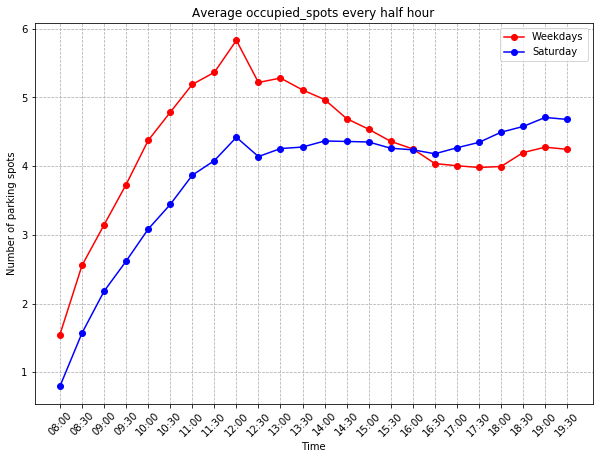

In [369]:
# Plot average occupied spots
plt.figure(figsize=(10,7))
plt.plot(summ_weekday_times_T.occupied_spots, '-ro', label='Weekdays')
plt.plot(summ_Sat_times_T.occupied_spots, '-bo', label='Saturday')
plt.title('Average occupied_spots every half hour')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of parking spots')
plt.xticks(all_times, rotation=45, horizontalalignment='center')
plt.grid(linestyle='--', linewidth=0.75)
plt.show()

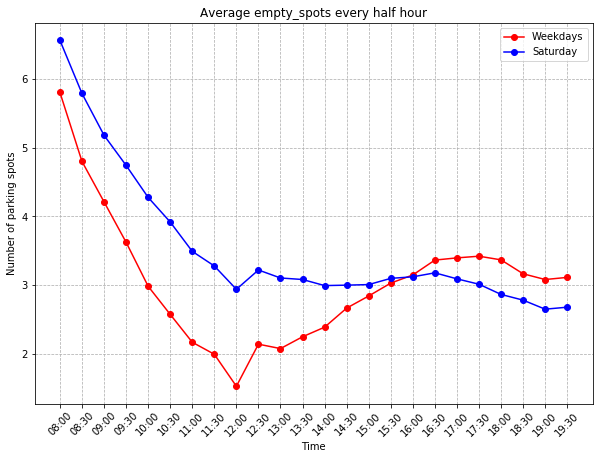

In [370]:
# Plot average empty spots
plt.figure(figsize=(10,7))
plt.plot(summ_weekday_times_T.empty_spots, '-ro', label='Weekdays')
plt.plot(summ_Sat_times_T.empty_spots, '-bo', label='Saturday')
plt.title('Average empty_spots every half hour')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of parking spots')
plt.xticks(all_times, rotation=45, horizontalalignment='center')
plt.grid(linestyle='--', linewidth=0.75)
plt.show()

From this analysis, it appears that average occupied_spots generally peaks weekdays around 12pm and weekends around 7pm for combined 2017/2018 data. On weekdays and weekends, occupancy increases throughout the morning. On weekdays, occupancy begins to decrease after 12pm to level out around 4:30 to 6pm and then icnrease slightly again to 7pm. On weekends, occupancy seems to hold relatively stable around 12-5pm and then increases slightly in the evening. 

#### Explore trends month by month. 

In [404]:
# Get month values 1-12
get_months = sorted(all_df.mm_transaction.unique())
# Empty df to store results 
summ_months = pd.DataFrame()

# Loop through each month
for month in get_months : 
    at_this_month = all_df[all_df['mm_transaction'] == month]
    summ_month = at_this_month[['occupied_spots', 'empty_spots', 'total_spots']].describe()
    summ_months = summ_months.append(summ_month.loc['mean',:], ignore_index=True)
summ_months.index = summ_months.index+1

In [405]:
summ_months = summ_months.T

In [407]:
print('Average value for each month based on automatic transaction data')
summ_months

Average value for each month based on automatic transaction data


,1,2,3,4,5,6,7,8,9,10,11,12
empty_spots,3.315,3.322,3.130,3.082,3.034,2.968,2.949,2.833,3.119,3.101,3.226,3.506
occupied_spots,4.097,4.066,4.252,4.277,4.330,4.384,4.389,4.514,4.256,4.265,4.140,3.841
total_spots,7.413,7.388,7.382,7.359,7.364,7.352,7.338,7.347,7.375,7.365,7.366,7.346


In [408]:
summ_months_T = summ_months.T

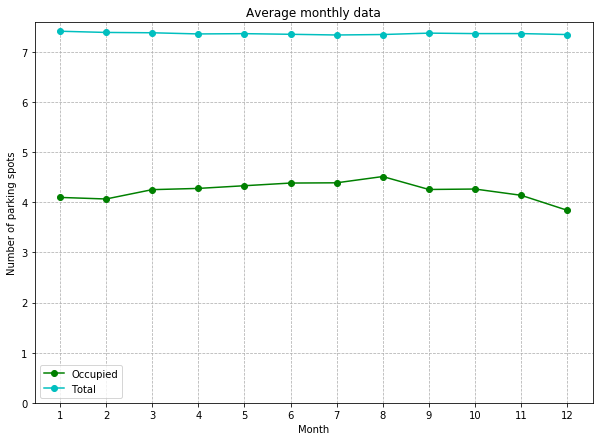

In [434]:
# Plot average monthly data
all_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10,7))
plt.plot(summ_months_T.occupied_spots, '-go', label='Occupied')
plt.plot(summ_months_T.total_spots, '-co', label='Total')
plt.title('Average monthly data')
plt.legend(loc='best')
plt.xlabel('Month')
plt.ylabel('Number of parking spots')
plt.xticks(np.arange(1,13))
plt.ylim(bottom=0)
plt.grid(linestyle='--', linewidth=0.75)
plt.show()

Monthly variation in average occupancy is quite small. There is a slight uptick in the summer months, potentially due to increased visitation? 

### Explore weather data

Check for weather stats (temp, rainfall, humidity) at each timestamp to see if there is a trend that exists. Given that above we identified average parking occupancy fluctuating throughout the day, we need to understand the relationship between weather/time to determine if that is interfering with any potential relationship between rainfall/occupancy. For example, is rain more likely at early hours of the day? 

In [460]:
# Empty df to store results analyzing rainfall and time 
summ_rainfall_time = pd.DataFrame()

for hour in get_hours : 
    for minute in get_mins : 
        at_this_time = all_df.loc[np.logical_and(all_df.hour_transaction == hour,
                                                 all_df.min_transaction == minute)]
        summ_time = at_this_time[['average_temp', 'rain_inches', 'humidity']].describe()
        summ_rainfall_time = summ_rainfall_time.append(summ_time.loc['mean',:], 
                                                       ignore_index=True)

# Transpose to flip columns and row axes names
summ_rainfall_time_T = summ_rainfall_time.T
# Assign timestamp name for each column 
summ_rainfall_time_T.columns = all_times # all_times defined earlier 

In [461]:
summ_rainfall_time_T

,08:00:00,08:30:00,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00,18:00:00,18:30:00,19:00:00,19:30:00
average_temp,50.178,50.179,52.061,52.063,53.978,53.978,55.786,55.782,57.408,57.408,58.761,58.758,59.802,59.803,60.385,60.360,60.389,60.383,59.578,59.577,58.094,58.095,56.175,56.175
humidity,84.268,84.268,80.177,80.177,75.664,75.664,71.158,71.164,67.375,67.375,64.120,64.124,61.785,61.781,60.311,60.334,60.292,60.297,62.109,62.109,65.700,65.696,70.059,70.060
rain_inches,0.005,0.005,0.005,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.006,0.006,0.006


Rain is the primary variable of interest here as potentially correlated with parking trends. The variation across times of day is very small. I will subset the df to only include records in which some rainfall occurred, to see if excluding times without rain causes more variation to emerge throughout the day. 

In [462]:
rain_df = all_df[all_df['rain_inches'] > 0]
rain_df.shape

(255161, 49)

In [463]:
# Empty df to store results analyzing rainfall and time 
summ_rainfall_time_v2 = pd.DataFrame()

for hour in get_hours : 
    for minute in get_mins : 
        at_this_time = rain_df.loc[np.logical_and(rain_df.hour_transaction == hour,
                                                  rain_df.min_transaction == minute)]
        summ_time = at_this_time[['average_temp', 'rain_inches', 'humidity']].describe()
        summ_rainfall_time_v2 = summ_rainfall_time_v2.append(summ_time.loc['mean',:], 
                                                             ignore_index=True)

# Transpose to flip columns and row axes names
summ_rainfall_time_v2_T = summ_rainfall_time_v2.T
# Assign timestamp name for each column 
summ_rainfall_time_v2_T.columns = all_times # all_times defined earlier 

In [464]:
summ_rainfall_time_v2_T

,08:00:00,08:30:00,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00,18:00:00,18:30:00,19:00:00,19:30:00
average_temp,46.446,46.446,47.086,47.086,46.749,46.749,47.141,47.140,47.677,47.677,47.945,47.948,48.709,48.702,48.795,48.784,49.427,49.432,50.030,50.031,49.583,49.585,48.299,48.299
humidity,95.155,95.155,94.492,94.492,92.962,92.962,91.827,91.827,91.029,91.029,90.594,90.593,90.291,90.294,91.098,91.122,91.264,91.263,90.384,90.384,90.985,90.986,92.611,92.611
rain_inches,0.045,0.045,0.038,0.038,0.036,0.036,0.034,0.034,0.035,0.035,0.041,0.041,0.046,0.046,0.050,0.050,0.051,0.051,0.042,0.042,0.047,0.047,0.042,0.042


Variation in rainfall throughout the day is a bit more noticeable now. Values are highest at 3pm and 4pm (0.050 and 0.051). They are lowest at 11am (0.034). 

More significant analysis will need to be conducted to determine statistically significant correlations. 

With this info, set threshold to analyze parking occupancy at times of rainfall above and below a threshold of 0.05. 

Compare parking occupancy at times of higher and lower rainfall. 

In [443]:
# Check mean and max rainfall records
print('Mean:', all_df.rain_inches.mean())
print('Max:', all_df.rain_inches.max())

Mean: 0.004769932987432824
Max: 0.26


In [447]:
# Subset all_df based on higher and lower amounts of rainfall 
high_rain = all_df[all_df['rain_inches'] >= 0.05]
low_rain = all_df[all_df['rain_inches'] < 0.05]

In [448]:
print(high_rain.shape)
print(low_rain.shape)

(88734, 49)
(2153830, 49)


In [450]:
summ_high_rain = high_rain[['occupied_spots', 'empty_spots', 'total_spots',
                            'total_spots_survey', 'occupied_spots_survey']].describe()
summ_low_rain = low_rain[['occupied_spots', 'empty_spots', 'total_spots',
                          'total_spots_survey', 'occupied_spots_survey']].describe()

In [452]:
summ_rain_df = pd.concat([summ_high_rain.loc['mean',:].rename('high_rain'),
                          summ_low_rain.loc['mean',:].rename('low_rain')], 
                          axis=1)
print('Mean values for each variable:')
summ_rain_df

Mean values for each variable:


,high_rain,low_rain
occupied_spots,3.990,4.249
empty_spots,3.390,3.116
total_spots,7.380,7.365
total_spots_survey,6.952,7.150
occupied_spots_survey,6.141,5.712


According to automatic transaction data, occupancy was slightly lower in 2017 and 2018 during hours of higher rainfall. But the manual survey data showed occupancy was slightly lower during periods of higher rainfall. This could be due to a smaller sample size on manual data, given it was taken over the course of about one day in Belltown North neighborhood. 